<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Загрузка-датасета" data-toc-modified-id="Загрузка-датасета-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка датасета</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Очмстка-по-длине" data-toc-modified-id="Очмстка-по-длине-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Очмстка по длине</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Разбивка-на-признаки-и-отклик" data-toc-modified-id="Разбивка-на-признаки-и-отклик-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Разбивка на признаки и отклик</a></span></li><li><span><a href="#Анализ-классов-отклика" data-toc-modified-id="Анализ-классов-отклика-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Анализ классов отклика</a></span></li><li><span><a href="#Разбивка-на-тестовый-и-тренировочный-наборы" data-toc-modified-id="Разбивка-на-тестовый-и-тренировочный-наборы-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Разбивка на тестовый и тренировочный наборы</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Базовая-линия" data-toc-modified-id="Базовая-линия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Базовая линия</a></span></li><li><span><a href="#Логистическая-регрессия-(мешок-слов)" data-toc-modified-id="Логистическая-регрессия-(мешок-слов)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия (мешок слов)</a></span><ul class="toc-item"><li><span><a href="#Стоп-слова" data-toc-modified-id="Стоп-слова-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Стоп-слова</a></span></li></ul></li><li><span><a href="#Логистическая-регрессия-(TF-IDF)" data-toc-modified-id="Логистическая-регрессия-(TF-IDF)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия (TF-IDF)</a></span></li><li><span><a href="#Наивный-Байес-(мешок-слов)" data-toc-modified-id="Наивный-Байес-(мешок-слов)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Наивный Байес (мешок слов)</a></span></li><li><span><a href="#Наивный-Байес-(TF-IDF)" data-toc-modified-id="Наивный-Байес-(TF-IDF)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Наивный Байес (TF-IDF)</a></span></li><li><span><a href="#Тестирование-лучшей-модели." data-toc-modified-id="Тестирование-лучшей-модели.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Тестирование лучшей модели.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорты

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from pattern.en import lemma

### Загрузка датасета

In [4]:
data = pd.read_csv("toxic_comments.csv", index_col=[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [5]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Загрузка прошла успешно, тексты на латинице.

### Очистка текста

Очищаем от цифр и знаков препинания.

In [6]:
data['text'] = data["text"].apply(lambda s: re.sub(r'[1-9.,"\'-?:!;_]', '', s))

Посмотрим на распределение текстов по длине.

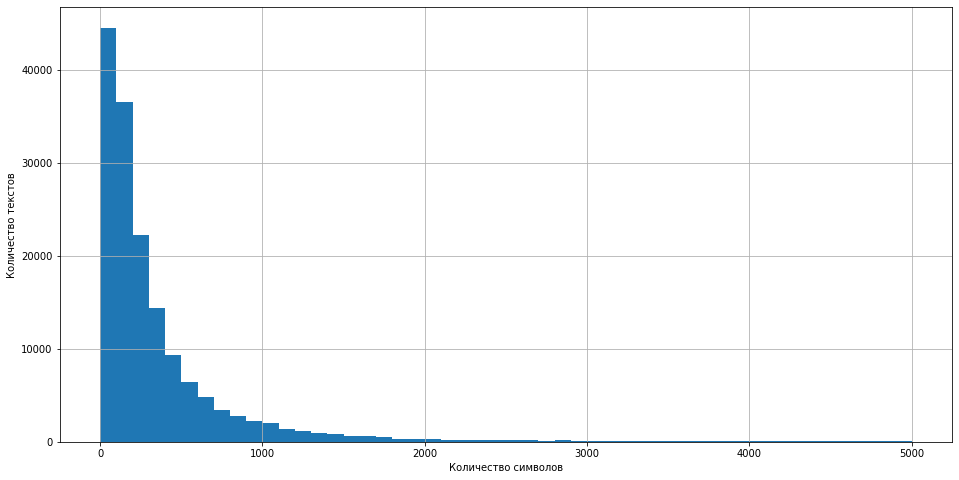

In [7]:
data['text'].apply(lambda s: len(s)).hist(bins=50, figsize=(16, 8));
plt.xlabel("Количество символов"); 
plt.ylabel("Количество текстов");

In [8]:
data['text'].apply(lambda s: len(s)).describe()

count    159292.000000
mean        374.997024
std         564.296812
min           0.000000
25%          89.000000
50%         194.000000
75%         415.000000
max        5000.000000
Name: text, dtype: float64

Есть как очень длинные так и очень короткие тексты. Были тексты которые состояли лишь из одних знаков препинание и после очистки стали пустыми.

In [9]:
data["lenght"] = data['text'].apply(lambda s: len(s))

In [10]:
data.query("lenght < 5")

,text,toxic,lenght
6293,,0,2
10206,,0,0
17297,~ \n\n,0,4
38792,,0,0
52393,,0,0
53740,|]],0,3
82619,\n,0,4
119123,,1,2
137547,,0,1
150804,Au,0,4


Странные тексты всё еще присутствуют, можем очистить так чтобы были только латиница и пробелы.

In [11]:
data['text'] = data["text"].apply(lambda s: re.sub(r'[^a-zA-Z\s]', '', s))
data['text'] = data["text"].apply(lambda s: re.sub(r'\n', ' ', s))

In [12]:
data["lenght"] = data['text'].apply(lambda s: len(s))
data.query("lenght < 5")

,text,toxic,lenght
6293,,0,2
10206,,0,0
17297,,0,3
38792,,0,0
52393,,0,0
53740,,0,0
82619,,0,4
119123,,1,2
136958,JLo,0,4
137547,,0,1


Очищаем от лишних пробелов.

In [13]:
data['text'] = data["text"].apply(lambda s: s.strip())
data["lenght"] = data['text'].apply(lambda s: len(s))
data.query("lenght < 5")

,text,toxic,lenght
177,May,0,3
4475,,0,0
6293,,0,0
10206,,0,0
12287,Jan,0,3
17297,,0,0
20544,ISBN,0,4
38792,,0,0
49220,talk,0,4
52393,,0,0


### Очистка по длине

Из предыдущего пункта очевидно, что слишком короткие коментарии не несут в основном эмоциональной окраски. Я считаю, что стоит удалить и длинные. Писать 5000 символов негатива может лишь очень изощрённый ум.

In [14]:
data.lenght.describe()

count    159292.000000
mean        372.739045
std         562.457036
min           0.000000
25%          88.000000
50%         193.000000
75%         413.000000
max        5000.000000
Name: lenght, dtype: float64

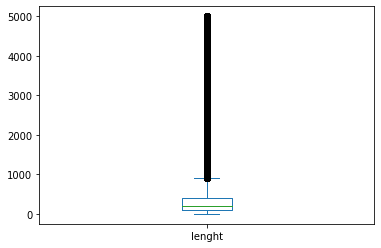

In [15]:
data.lenght.plot.box();

Удалим выбросы.

In [16]:
data = data.query("5 <= lenght <= 1000")

### Лемматизация

In [17]:
print(data['text'][0])

Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They werent vandalisms just closure on some GAs after I voted at New York Dolls FAC And please dont remove the template from the talk page since Im retired now


In [19]:
data['text'] = data['text'].apply(lambda s: " ".join([lemma(wd) for wd in s.split()]))
print(data['text'][0])

explanation why the edit make under my username hardcore metallica fan be revert they werent vandalism just closure on some gas after i vote at new york doll fac and please dont remove the template from the talk page since im retire now


### Разбивка на признаки и отклик

In [20]:
X = data["text"].values
y = data["toxic"]

### Анализ классов отклика

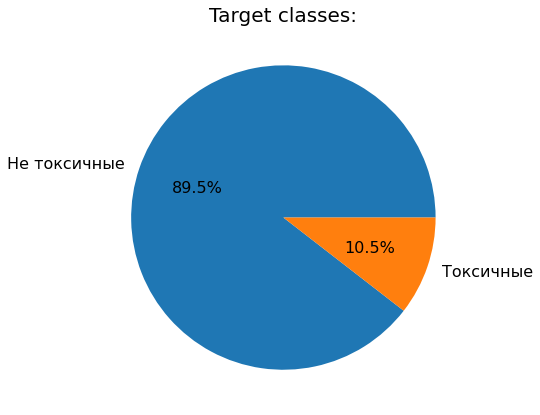

In [21]:
fig = y.value_counts().rename(index={1:"Токсичные", 0:"Не токсичные"}).plot(kind='pie', 
                                            title="Target classes:",
                                            fontsize=16,
                                            legend=False,
                                            autopct='%1.1f%%',
                                            figsize=(7,7))
fig.axes.title.set_size(20)
fig.axes.set_ylabel(None);

Большой дисбаланс классов - нужно учесть при построении модели.

### Разбивка на тестовый и тренировочный наборы

In [22]:
SEED = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=SEED)

## Обучение

### Базовая линия

In [23]:
dummy = DummyClassifier(strategy="stratified", random_state=SEED)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)
f1_score(y_train, y_pred)

0.10188166273163053

### Логистическая регрессия (мешок слов)

#### Стоп-слова

In [24]:
STOP_WORDS = """
i
me
my
myself
we
our
ours
ourselves
you
youre
youve
youll
youd
your
yours
yourself
yourselves
he
him
his
himself
she
shes
her
hers
herself
it
its
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
thatll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
dont
should
shouldve
now
d
ll
m
o
re
ve
y
ain
aren
arent
couldn
couldnt
didn
didnt
doesn
doesnt
hadn
hadnt
hasn
hasnt
haven
havent
isn
isnt
ma
mightn
mightnt
mustn
mustnt
needn
neednt
shan
shant
shouldn
shouldnt
wasn
wasnt
weren
werent
won
wont
wouldn
wouldnt
""".split()
print(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [25]:
count_vect = CountVectorizer(stop_words=STOP_WORDS)
lr = LogisticRegression(random_state=SEED, class_weight="balanced", max_iter=10000)
pipe = Pipeline([("bow", count_vect), ("lr", lr)])
params = {"lr__C":np.logspace(-4, 2, 7)}
gscv_lr_bow = GridSearchCV(pipe, params, scoring="f1", verbose=3, n_jobs=-1)
gscv_lr_bow.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    'youre',
                                                                    'youve',
                                                                    'youll',
                                                                    'youd',
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    'shes',
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it', 'its',
                                                                    'its',
                                                                    'itself', ...])),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=12345))]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1', verbose=3)

In [26]:
best_lr_bow_cv_f1 = abs(gscv_lr_bow.best_score_)
best_lr_bow_C = gscv_lr_bow.best_params_["lr__C"]
best_lr_bow = gscv_lr_bow.best_estimator_
print(f"F1 (cv) for best Log reg (words bow) model = {best_lr_bow_cv_f1:.2f} for C = {best_lr_bow_C}")

F1 (cv) for best Log reg (words bow) model = 0.76 for C = 1.0


Очень неплохо.

### Логистическая регрессия (TF-IDF)

In [27]:
count_tf_idf = TfidfVectorizer(stop_words=STOP_WORDS)
pipe = Pipeline([("tfidf", count_tf_idf), ("lr", lr)])
gscv_lr_tfidf = GridSearchCV(pipe, params, scoring="f1", verbose=3, n_jobs=-1)
gscv_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    'youre',
                                                                    'youve',
                                                                    'youll',
                                                                    'youd',
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    'shes',
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it', 'its',
                                                                    'its',
                                                                    'itself', ...])),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=12345))]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1', verbose=3)

In [28]:
best_lr_tfidf_cv_f1 = abs(gscv_lr_tfidf.best_score_)
best_lr_tfidf_C = gscv_lr_tfidf.best_params_["lr__C"]
best_lr_tfidf = gscv_lr_tfidf.best_estimator_
print(f"F1 (cv) for best Log reg (TF-IDF) model = {best_lr_tfidf_cv_f1:.2f} for C = {best_lr_tfidf_C}")

F1 (cv) for best Log reg (TF-IDF) model = 0.77 for C = 10.0


Работает лучше, чем для простого мешка слов, но при высоких значениях C.

### Наивный Байес (мешок слов)
Эта модель часто применяется для анализа тональности текстов из классических методов ML. Используем мультиноминальный классификатор, который лучше подходит для дискретных величин, типа подсчёта слов. Будем подбирать параметр сглаживания.

In [29]:
nb = MultinomialNB()
pipe = Pipeline([("bow", count_vect), ("nb", nb)])
params = {"nb__alpha":np.logspace(-4, 0, 5)}
gscv_nb_bow = GridSearchCV(pipe, params, scoring="f1", verbose=3, n_jobs=-1)
gscv_nb_bow.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    'youre',
                                                                    'youve',
                                                                    'youll',
                                                                    'youd',
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    'shes',
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it', 'its',
                                                                    'its',
                                                                    'itself', ...])),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             scoring='f1', verbose=3)

In [30]:
best_nb_bow_cv_f1 = abs(gscv_nb_bow.best_score_)
best_nb_bow_alpha = gscv_nb_bow.best_params_["nb__alpha"]
best_nb_bow = gscv_nb_bow.best_estimator_
print(f"F1 (cv) for best naive Bayes (words bow) model = {best_nb_bow_cv_f1:.2f} for Alpha = {best_nb_bow_alpha}")

F1 (cv) for best naive Bayes (words bow) model = 0.72 for Alpha = 0.1


Работает несколько хуже, чем логистическая регрессия, но зато значительно быстрее обучается при оптимальном гиперпараметре.

### Наивный Байес (TF-IDF)
Хотя мультиноминальный классификатор и предназначена для дискретных признаков, он, по словам авторов, неплохо работает и с TD-IDF.

In [31]:
pipe = Pipeline([("tfidf", count_tf_idf), ("nb", nb)])
gscv_nb_tfidf = GridSearchCV(pipe, params, scoring="f1", verbose=3, n_jobs=-1)
gscv_nb_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    'youre',
                                                                    'youve',
                                                                    'youll',
                                                                    'youd',
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    'shes',
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it', 'its',
                                                                    'its',
                                                                    'itself', ...])),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             scoring='f1', verbose=3)

In [36]:
best_nb_tfidf_cv_f1 = abs(gscv_nb_tfidf.best_score_)
best_nb_tfidf_alpha = gscv_nb_tfidf.best_params_["nb__alpha"]
best_nb_tfidf = gscv_nb_bow.best_estimator_
print(f"F1 (cv) for best naive Bayes (TF_IDF) model = {best_nb_tfidf_cv_f1:.2f} for Alpha = {best_nb_tfidf_alpha}")

F1 (cv) for best naive Bayes (TF_IDF) model = 0.66 for Alpha = 0.01


Значительно хуже, чем на мешке слов.

**Промежуточный вывод:** Логистическая регрессия оказалась лучше для обоих вариантов признаков, однако Байес обучался значительно быстрее чеи логистическая регрессия при оптимальном гиперпараметре, но всё равно логистическая регрессия обучается быстро. Для неё оказался оптимальнеей вектор признаков на основе tf-idf и параметр регуляризации ~10. 

### Тестирование лучшей модели.

In [37]:
y_pred = dummy.predict(X_test)
f1_score(y_test, y_pred)

0.0957854406130268

In [38]:
y_pred = best_lr_tfidf.predict(X_test)
round(f1_score(y_test, y_pred), 2)

0.77

Целевое значение метрики достигнуто!

## Выводы

Для анализа тональности текстов используются обычно один из двух подходов: классическое ML на основе признаков (мешок слов, n-граммы, tf-idf) либо глубокое обучение на основе языковых моделей. Глубокое обучение более точное, однако, как правило более ресурсо-затратно. Я решил в своём проекте использовать классические методы. В качестве признаков взяты либо вектор на основе мешка слов либо на основе tf-idf. После предварительной очистки и лемматизации датасета были обучены модель на основе логистической регрессии и наивного байесового классификатора.  
Логистическая регрессия оказалась лучше для обоих вариантов признаков, однако Байес обучался значительно быстрее чеи логистическая регрессия при оптимальном гиперпараметре, но всё равно логистическая регрессия обучается быстро. Для неё оказался оптимальнеей вектор признаков на основе tf-idf. Эта модель прошла тестирование на тестовом наборе и показала достаточно высокое значение метрики f1.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны